<a href="https://colab.research.google.com/github/shiva-jyothi/Assignments/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm







In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#reading the data from the drive which is open to everyone
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [7]:
#first five rows of our data
df.head()

,req_count,time_to_live,time_lag,resolved_req
0,100,10,1,10
1,100,10,2,20
2,100,10,3,30
3,100,10,4,40
4,100,10,5,50


In [8]:
#Dropping the req_count column because it is constant throught the data
df=df.drop('req_count',axis=1);

In [10]:
#data after removing the first column
df.head()

,time_to_live,time_lag,resolved_req
0,10,1,10
1,10,2,20
2,10,3,30
3,10,4,40
4,10,5,50


In [11]:
#description of the data
desc=df.describe()
print(desc)

       time_to_live     time_lag  resolved_req
count   1710.000000  1710.000000   1710.000000
mean      54.500000    10.000000     25.259649
std       25.986758     5.478828     23.092668
min       10.000000     1.000000      1.000000
25%       32.000000     5.000000     10.000000
50%       54.500000    10.000000     18.000000
75%       77.000000    15.000000     32.000000
max       99.000000    19.000000    100.000000


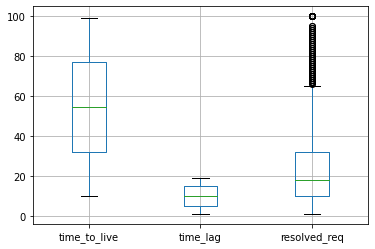

In [12]:
#this plot demonistrates the range of values each column has
boxplot = df.boxplot(column=['time_to_live', 'time_lag', 'resolved_req'])


In [13]:
#Extracting the values of the column into variables.
ttl=df.loc[:,'time_to_live']
tl=df.loc[:,'time_lag']
rr=df.loc[:,'resolved_req']
print(list(ttl))
print(list(tl))
print(list(rr))

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23,

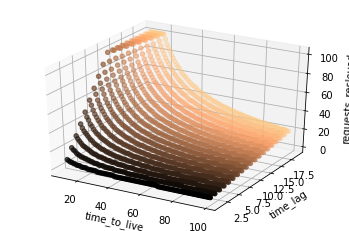

In [14]:
#plotting a scatter map to visualize entire data
x=list(ttl)
y=list(tl)
z=list(rr)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pl = ax.scatter(x,y,z,c=tl,cmap='copper')
ax.set_xlabel('time_to_live')
ax.set_ylabel('time_lag')
ax.set_zlabel('requests_resloved')
fig.show()






In [15]:
#seperating the data into train and test parts
train, test = train_test_split(df, test_size=0.2)
x_train = train[['time_to_live', 'time_lag']]
x_test = test[['time_to_live', 'time_lag']]
y_train = train['resolved_req']
y_test = test['resolved_req']
print(x_train)
print(y_train)
print(x_test)
print(y_test)


      time_to_live  time_lag
620             42        13
1098            67        16
1589            93        13
1522            90         3
61              13         5
...            ...       ...
362             29         2
802             52         5
449             33        13
1360            81        12
429             32        12

[1368 rows x 2 columns]
620     31
1098    24
1589    14
1522     3
61      38
        ..
362      7
802     10
449     39
1360    15
429     38
Name: resolved_req, Length: 1368, dtype: int64
      time_to_live  time_lag
1554            91        16
88              14        13
1516            89        16
136             17         4
815             52        18
...            ...       ...
434             32        17
681             45        17
1697            99         7
1300            78         9
1402            83        16

[342 rows x 2 columns]
1554    18
88      93
1516    18
136     24
815     35
        ..
434     53
681     38

In [16]:
#regression model showing the alpha,beta values and R^2 values.
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.coef_)
print(regr.intercept_)
print(regr.score(x_test,y_test))



[-0.58003211  2.43309934]
32.55341500097084
0.7340877898023684
